In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('AB_Test_Results.xlsx')
df.sample(10)

,USER_ID,VARIANT_NAME,REVENUE
2689,4375,variant,0.0
2334,8990,control,0.0
2350,762,variant,0.0
9179,4711,variant,0.0
503,2857,control,0.0
5564,5205,control,0.0
1814,5873,control,0.0
4537,604,control,0.0
7795,9637,variant,0.0
6523,1326,control,0.0


In [3]:
df.USER_ID.value_counts()

5652    6
8359    6
668     6
9101    6
4879    6
       ..
5455    1
1399    1
6967    1
3156    1
9468    1
Name: USER_ID, Length: 6324, dtype: int64

In [4]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(7933, 3)

In [5]:
df.USER_ID.value_counts()

701     3
7358    3
9669    3
831     3
9942    3
       ..
4127    1
6398    1
9719    1
3812    1
9468    1
Name: USER_ID, Length: 6324, dtype: int64

In [6]:
df[df.USER_ID == 701]

,USER_ID,VARIANT_NAME,REVENUE
376,701,control,0.00
3218,701,control,17.08
7386,701,variant,0.00


In [7]:
df = df[df.REVENUE > 0]
df.USER_ID.value_counts()

1252    2
7912    2
2181    1
1108    1
912     1
       ..
618     1
2059    1
9176    1
6678    1
4678    1
Name: USER_ID, Length: 150, dtype: int64

In [8]:
df[df.USER_ID == 1252]

,USER_ID,VARIANT_NAME,REVENUE
4123,1252,variant,1.25
8108,1252,control,1.26


In [9]:
df[df.USER_ID == 7912]

,USER_ID,VARIANT_NAME,REVENUE
4575,7912,variant,2.16
6344,7912,variant,1.25


In [10]:
df = df[(df.USER_ID != 7912) & (df.USER_ID != 1252)]
df.USER_ID.value_counts(), df.shape

(2529    1
 9491    1
 1108    1
 912     1
 8920    1
        ..
 618     1
 2059    1
 9176    1
 6678    1
 4678    1
 Name: USER_ID, Length: 148, dtype: int64,
 (148, 3))

In [11]:
df_A = df[df.VARIANT_NAME== 'control']
df_B = df[df.VARIANT_NAME == 'variant']
df_A.shape[0], df_B.shape[0]

(79, 69)

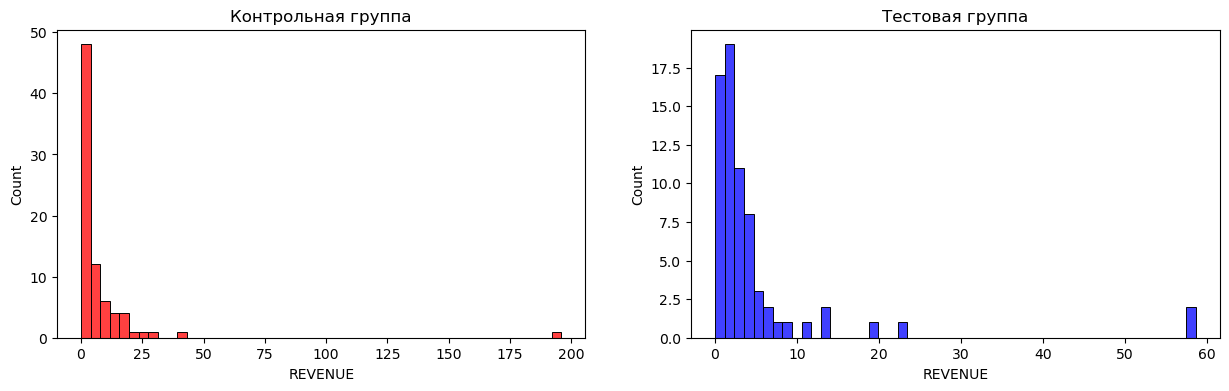

In [12]:
fig, (ax_histplot, ay_histplot) = plt.subplots(1, 2, figsize=(15,4))

ax_histplot.set_title(f"Контрольная группа")
ay_histplot.set_title(f"Тестовая группа")
sns.histplot(df_A['REVENUE'], color='r', bins=50, ax=ax_histplot)
sns.histplot(df_B['REVENUE'], color='b', bins=50, ax=ay_histplot);

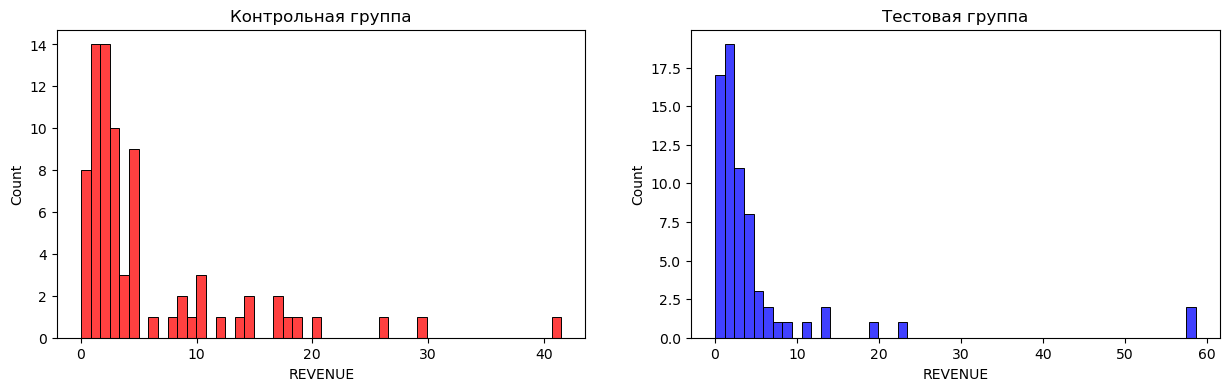

In [13]:
df_A = df_A[df_A.REVENUE < 60]

fig, (ax_histplot, ay_histplot) = plt.subplots(1, 2, figsize=(15,4))

ax_histplot.set_title(f"Контрольная группа")
ay_histplot.set_title(f"Тестовая группа")
sns.histplot(df_A['REVENUE'], color='r', bins=50, ax=ax_histplot)
sns.histplot(df_B['REVENUE'], color='b', bins=50, ax=ay_histplot);

In [14]:
df_A.describe()

,USER_ID,REVENUE
count,78.000000,78.000000
mean,4517.461538,5.714487
std,2835.969908,7.373671
min,124.000000,0.020000
25%,2078.750000,1.530000
50%,4584.500000,2.960000
75%,6664.250000,6.007500
max,9766.000000,41.530000


In [15]:
df_B.describe()

,USER_ID,REVENUE
count,69.000000,69.000000
mean,5290.217391,5.026232
std,3114.429666,10.104702
min,56.000000,0.020000
25%,2767.000000,1.230000
50%,5597.000000,2.240000
75%,8110.000000,3.980000
max,9996.000000,58.630000


In [16]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(df_A.REVENUE.values, df_B.REVENUE.values)
stat, p_value

(3083.5, 0.12805010520783802)